In [8]:
# Import Dependencies
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import time
# Import API key
from api_keys import api_key

# Citipy 
from citipy import citipy

# Cities Output File 
output_file = "output/cities.csv"

# Range of lat/lng
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

# Random to reduce bias
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Nearby City 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Is the city unique
    if city not in cities:
        cities.append(city)
        
len(cities)


632

## Perform API Calls

In [3]:
newcities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
windspeed = []

record_counter = 1
set_counter = 1


url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    record_counter += 1


    print('{} of {} | {}'.format(record_counter, len(cities), city))
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        windspeed.append(response['wind']['speed'])
        newcities.append(city)
    except:
        print("Error, something went wrong with response")
        pass

# print(cloudiness, country, humidity, temp, lat, lng, windspeed, new_cities)

------------------------
2 of 632 | sao joao da barra
3 of 632 | albany
4 of 632 | faanui
5 of 632 | colares
6 of 632 | tazovskiy
7 of 632 | tena
8 of 632 | zistersdorf
9 of 632 | smithers
10 of 632 | tevaitoa
11 of 632 | hobart
12 of 632 | san cristobal
13 of 632 | rikitea
14 of 632 | pyatnitskoye
15 of 632 | illoqqortoormiut
Error, something went wrong with response
16 of 632 | saint-georges
17 of 632 | tiksi
18 of 632 | jamestown
19 of 632 | bara
20 of 632 | gornopravdinsk
21 of 632 | clyde river
22 of 632 | vaini
23 of 632 | hami
24 of 632 | ushuaia
25 of 632 | puerto ayora
26 of 632 | nikolskoye
27 of 632 | cape town
28 of 632 | taolanaro
Error, something went wrong with response
29 of 632 | bredasdorp
30 of 632 | east london
31 of 632 | great falls
32 of 632 | mys shmidta
Error, something went wrong with response
33 of 632 | atuona
34 of 632 | gat
35 of 632 | swiecie
36 of 632 | butaritari
37 of 632 | souillac
38 of 632 | balurghat
39 of 632 | ilulissat
40 of 632 | punta arenas
4

307 of 632 | meulaboh
308 of 632 | bengkulu
Error, something went wrong with response
309 of 632 | sicuani
310 of 632 | sechura
311 of 632 | makubetsu
312 of 632 | chakwal
313 of 632 | okhotsk
314 of 632 | ovalle
315 of 632 | mogadishu
316 of 632 | san lorenzo
317 of 632 | cam ranh
318 of 632 | mahebourg
319 of 632 | jacareacanga
320 of 632 | seydi
321 of 632 | rapar
322 of 632 | mokhsogollokh
323 of 632 | touros
324 of 632 | ponta delgada
325 of 632 | tura
326 of 632 | mao
327 of 632 | khasan
328 of 632 | georgetown
329 of 632 | imeni stepana razina
330 of 632 | zhuhai
331 of 632 | south charleston
332 of 632 | las vegas
333 of 632 | afonso bezerra
334 of 632 | yavatmal
335 of 632 | kayerkan
336 of 632 | straja
337 of 632 | hofn
338 of 632 | rock springs
339 of 632 | ashoknagar
340 of 632 | angoche
341 of 632 | meridian
342 of 632 | dunedin
343 of 632 | lasa
344 of 632 | graaff-reinet
345 of 632 | tallahassee
346 of 632 | kavaratti
347 of 632 | kjollefjord
348 of 632 | maniitsoq
349 o

In [4]:
print(len(newcities), len(cloudiness), len(country), len(humidity), len(lat), len(lng), len(windspeed))

# Weather Dictionary
weather_dict = {
    "City": newcities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind_Speed" : windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

578 578 578 578 578 578 578


City          578
Cloudiness    578
Country       578
Humidity      578
Temp          578
Lat           578
Lng           578
Wind_Speed    578
dtype: int64

In [5]:
weather_data.head

<bound method NDFrame.head of                   City  Cloudiness Country  Humidity   Temp    Lat     Lng  \
0    sao joao da barra          85      BR        88  78.44 -21.64  -41.05   
1               albany          90      US        63  33.01  42.65  -73.75   
2               faanui          13      PF        80  82.17 -16.48 -151.75   
3              colares           0      PT        87  48.99  38.80   -9.45   
4            tazovskiy          95      RU        94   7.02  67.47   78.70   
..                 ...         ...     ...       ...    ...    ...     ...   
573            lazarev          97      RU        81  10.36  52.23  141.51   
574             koumac          54      NC        58  81.61 -20.56  164.28   
575            klyuchi          52      RU        90   2.75  52.25   79.17   
576         cape coast          27      GH        81  79.93   5.11   -1.24   
577            ushtobe         100      KZ        95  23.04  45.25   77.98   

     Wind_Speed  
0         17.56

In [6]:
cities_list = (newcities,cloudiness,country,date,humidity,temp,lat,lng)
# Output Path
output_file = os.path.join('..', 'output', 'cities.csv')

with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)


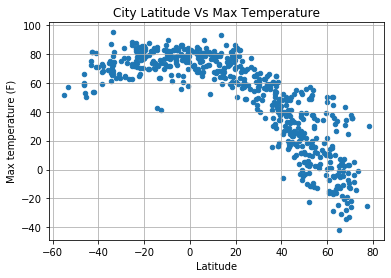

In [9]:
# Latitude Vs Temperature Plot

weather_data.plot(kind='scatter', x='Lat', y='Temp')
plt.title('City Latitude Vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../output/LatitudeVsTemperature.png")
plt.show()

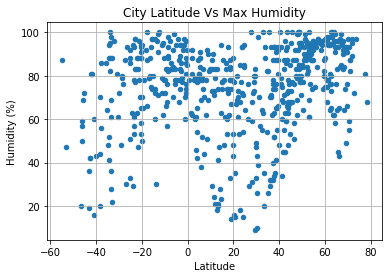

In [10]:
# Latitude Vs Humidity

weather_data.plot(kind='scatter',x='Lat',y='Humidity')
plt.title('City Latitude Vs Max Humidity' )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../output/LatitudeVsHumidity.png")
plt.show()

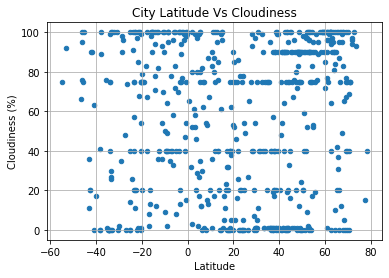

In [11]:
# Latitude Vs Cloudiness

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness')
plt.title('City Latitude Vs Cloudiness' )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../output/LatitudeVsCloudiness.png")
plt.show()

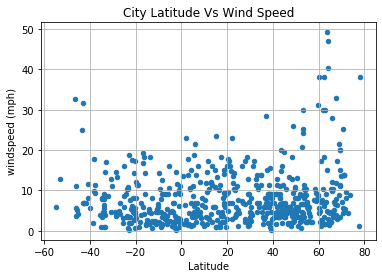

In [18]:
# Latitude Vs Wind Speed

weather_data.plot(kind='scatter',x='Lat',y='Wind_Speed')
plt.title('City Latitude Vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('windspeed (mph)')
plt.grid()
plt.savefig("../output/LatitudeVsWindSpeed.png")
plt.show()

In [ ]:
#First off, there is a strong coorelation between a city's latitude and it's temperature. The closer to 0, the higher the tempurature.
#Secondly, there seems to be no strong coorelation between a city's cloudiness and it's latitude.
#Third, it appears that it isn't common to have windspeeds over 20mph, regardless of a city's latitude. 